In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import statistics

In [15]:
""" 
Player class reads in player stats data and returns different statistics, true shooting percentage, and efficiency of players.
"""
class Player():
    playerstats = pd.read_csv("NBA_Player_Stats.csv")
    league = "NBA"
    mvp_status = ["mvp"]
    """
    Constructor for a player object. Takes in the player's name and season.
    """
    def __init__(self, player, season):
        playerstats = pd.read_csv("NBA_Player_Stats.csv")
        #player, position, season, fg, fga, fg_percent, tp, tpa, tp_percent, ft, fta, ft_percent, pts
        self.player = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["Player"]
        self.position = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["Pos"]
        self.season = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["Year"]
        self.fga = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FGA"]
        self.fg = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FG"]
        self.fg_percent = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FG%"]
        self.tpa = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["3PA"]
        self.tp = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["3P"]
        self.tp_percent = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["3P%"]
        self.fta = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FTA"]
        self.ft = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FT"]
        self.ft_percent = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FT%"]
        self.pts = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["PTS"]
        
    """
    Returns statistics of choice if they exists in the dataset. Else, throws an error.
    """ 
    def get_statistic(self, statistic):
        statistic_noncap = statistic.lower()
        if hasattr(self, statistic_noncap) == True:
            return getattr(self, statistic_noncap).values[0]
        else:
            print( "Oops! We don't have that statistics. Try again!" )
        
    """ 
    Calculates and returns true shooting percentage of the player.
    """
    def true_shooting(self):
        ts = (self.pts)/(2*(self.fga + (0.44 * self.fta)))
        return ts.values[0]
    
    """ 
    Calculates and returns the efficiency of the player.
    """
    def efficiency(self):
        efg = (self.fg + (0.5 * self.tp))/(self.fga)
        return efg.values[0]
    
    #TODO: Write 3 stats calculating function and 2 visualization functions (maybe?) that pulls data directly from playerstats.
    #We tried to compare 2 players with compare_vis but it's not working, keeping it for reference.
    # def compare_vis(self, Player):
    #     ## put a check if the data exists for both players in the same season
    #     ## create another player object to compare
        
    #     # new_player = Player(other_player_name, self.season)
    #     x = self.fg
    #     y = Player.fg
    #     plt.plot(x)
    #     plt.show()


In [16]:
df = pd.read_csv("NBA_Team_Stats.csv")

In [17]:
df.columns

Index(['No', 'Team', 'G', 'Min', 'Pts', 'Reb', 'Ast', 'Stl', 'Blk', 'To', 'Pf',
       'Dreb', 'Oreb', 'Fgm-a', 'Pct', '3gm-a', 'Pct.1', 'Ftm-a', 'Pct.2',
       'Eff', 'Deff', 'Year'],
      dtype='object')

In [18]:
# Test for the functions
Curry = Player(player = "Stephen Curry", season = "2015-2016")

In [19]:
LeBron = Player(player = "LeBron James", season = "2015-2016")

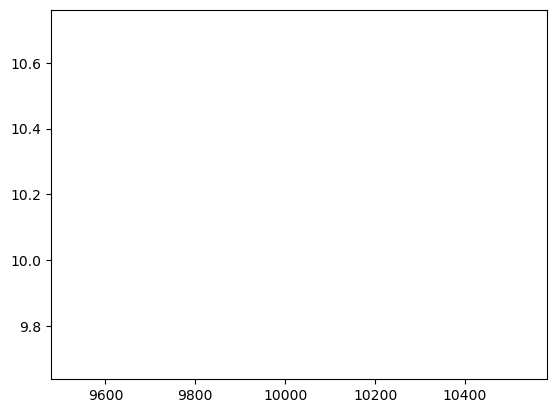

In [20]:
Curry.compare_vis(LeBron)

In [14]:
Curry.get_statistic("FTA")

5.1

In [ ]:
Curry.get_statistic("HPA")

Oops! We don't have that statistics. Try again!


In [ ]:
Curry.true_shooting()

0.6705578328283729

In [ ]:
Curry.efficiency()

0.6311881188118812